In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mdshare
import pyemma
# for visualization of molecular structures:
import nglview
import mdtraj 
from threading import Timer
from nglview.player import TrajectoryPlayer
from pyemma.util.contexts import settings

## Loading the data

In [2]:
files = ['prot_corrected_fit_aligned_a2.5_01_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_02_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_03_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_04_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_05_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_06_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_07_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_08_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_09_10skips.xtc', 'prot_corrected_fit_aligned_a2.5_010_10skips.xtc']

### backbone torsion angles

In [3]:
import pyemma.coordinates 
torsions_feat = pyemma.coordinates.featurizer('prot_only-firstframe_a2.5_01.gro') 
torsions_feat.add_backbone_torsions(cossin=True, periodic=False) 
torsions_data= pyemma.coordinates.load(files, features=torsions_feat)
labels = ['BB\nTorsions']

Obtaining file info:   0%|                                                                                    …

getting output of FeatureReader:   0%|                                                                        …

In [4]:
len(torsions_data[0])

10001

### backbone heavy atom distances 
maybe not the best feature, has the least VAMP-2 score. But the low VAMP-2 score doesn't neccessarily mean that the feature doesn't provide a good description of the system it only means that there are less kintetic information for that feature. We want the most kintetic information we can get but at the same time we want valuable kinetic information. 

In [5]:
distances_feat = pyemma.coordinates.featurizer('prot_only-firstframe_a2.5_01.gro') 
distances_feat.add_distances(distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False) 
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels += ['BB atom\nDistances']

Obtaining file info:   0%|                                                                                    …

getting output of FeatureReader:   0%|                                                                        …

### distances between Ca's

In [6]:
distances_ca_feat = pyemma.coordinates.featurizer('prot_only-firstframe_a2.5_01.gro') 
distances_ca_feat.add_distances_ca(excluded_neighbors=2, periodic=False) 
distances_ca_data = pyemma.coordinates.load(files, features=distances_ca_feat)
labels += ['C\u03B1 Atom\nDistances']

Obtaining file info:   0%|                                                                                    …

getting output of FeatureReader:   0%|                                                                        …

### backbone heavy atom positions

In [7]:
positions_feat = pyemma.coordinates.featurizer('prot_only-firstframe_a2.5_01.gro') 
positions_feat.add_selection(positions_feat.select_Backbone())
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels += ['BB Atom\nPositions']

Obtaining file info:   0%|                                                                                    …

getting output of FeatureReader:   0%|                                                                        …

### combo feature - mix of Ca distance and bb torsion angles
Nav, showed us that when we define a variable and load the trajectory we can add as many features as we want to that variable. I'm doing the what he showed us below:

In [8]:
tor_ca_feat = pyemma.coordinates.featurizer('prot_only-firstframe_a2.5_01.gro') 
tor_ca_feat.add_backbone_torsions(cossin=True, periodic=False)
tor_ca_feat.add_distances_ca(excluded_neighbors=2, periodic=False)
tor_ca_data = pyemma.coordinates.load(files, features=tor_ca_feat)
labels += ['C\u03B1 Dist\n- BB Torsion']

Obtaining file info:   0%|                                                                                    …

getting output of FeatureReader:   0%|                                                                        …

### combo feature - mix of bb distance and bb torsion angles

In [9]:
dist_tor_feat = pyemma.coordinates.featurizer('prot_only-firstframe_a2.5_01.gro') 
dist_tor_feat.add_backbone_torsions(cossin=True, periodic=False)
dist_tor_feat.add_distances(distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False) 
dist_tor_data = pyemma.coordinates.load(files, features=dist_tor_feat)
labels += ['BB Dist\n- BB Torsion']

Obtaining file info:   0%|                                                                                    …

getting output of FeatureReader:   0%|                                                                        …

In [10]:
len(torsions_data[0][0])

60

In [11]:
len(distances_ca_data[0][0])

91

In [12]:
len(positions_data[0][0])

144

In [13]:
len(distances_data[0][0])

1098

In [14]:
len(tor_ca_data[0][0])

151

In [15]:
len(dist_tor_data[0][0])

1158

## Feature Selection

We will now rank the three featurizations by means of the VAMP2 score which measures the kinetic variance contained in these features.
The minimum value of this score is 1, which corresponds to the invariant measure or equilibrium.
As we are comparing featurizations with different dimensionality, we use the dimension parameter to provide an upper bound for the number of dynamic processes included in the scoring.

### 10 dimensions

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

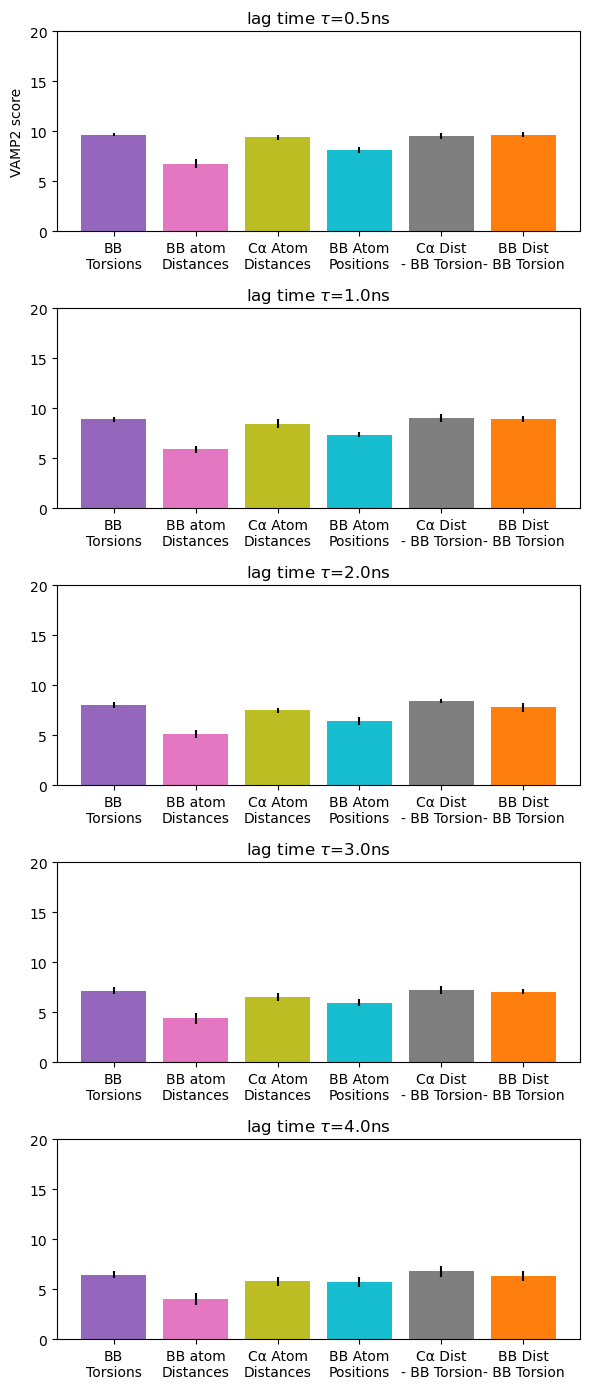

In [16]:
def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    # we temporarily suppress very short-lived progress bars
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in range(number_of_splits):
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


dim = 10

fig, axes = plt.subplots(5, 1, figsize=(6, 14), sharey=True)
for ax, lag in zip(axes.flat, [5, 10, 20, 30, 40]):
#     dssp_alpha_scores = score_cv(final_dssp[:,0], lag=lag, dim=1)
#     scores += [dssp_alpha_scores.mean()]
#     errors += [dssp_alpha_scores.std()]
#     dssp_beta_scores = score_cv(final_dssp[:,1], lag=lag, dim=1)
#     scores += [dssp_beta_scores.mean()]
#     errors += [dssp_beta_scores.std()]
#     dssp_coil_scores = score_cv(final_dssp[:,2], lag=lag, dim=1)
#     scores += [dssp_coil_scores.mean()]
#     errors += [dssp_coil_scores.std()]
#     rg_scores = score_cv(final_rg, lag=lag, dim=1)
#     scores += [rg_scores.mean()]
#     errors += [rg_scores.std()]
#     pr_scores_1st = score_cv(final_pr[:,2], lag=lag, dim=1)
#     scores += [pr_scores_1st.mean()]
#     errors += [pr_scores_1st.std()]
#     pr_scores_2nd = score_cv(final_pr[:,1], lag=lag, dim=1)
#     scores += [pr_scores_2nd.mean()]
#     errors += [pr_scores_2rd.std()]
#     pr_scores_3rd = score_cv(final_pr[:,0], lag=lag, dim=1)
#     scores += [pr_scores_3rd.mean()]
#     errors += [pr_scores_3rd.std()]
#     rmsd_scores = score_cv(final_rmsd, lag=lag, dim=1)
#     scores += [rmsd_scores.mean()]
#     errors += [rmsd_scores.std()]
    torsions_scores = score_cv(torsions_data, lag=lag, dim=dim)
    scores = [torsions_scores.mean()]
    errors = [torsions_scores.std()]
    positions_scores = score_cv(positions_data, lag=lag, dim=dim)
    scores += [positions_scores.mean()]
    errors += [positions_scores.std()]
    distances_scores = score_cv(distances_data, lag=lag, dim=dim)
    scores += [distances_scores.mean()]
    errors += [distances_scores.std()]
    distances_ca_scores = score_cv(distances_ca_data, lag=lag, dim=dim)
    scores += [distances_ca_scores.mean()]
    errors += [distances_ca_scores.std()]
    tor_ca_scores = score_cv(tor_ca_data, lag=lag, dim=dim)
    scores += [tor_ca_scores.mean()]
    errors += [tor_ca_scores.std()]
    dist_tor_scores = score_cv(dist_tor_data, lag=lag, dim=dim)
    scores += [dist_tor_scores.mean()]
    errors += [dist_tor_scores.std()]
    ax.bar(labels, scores, yerr=errors, color=['C4', 'C6', 'C8', 'C9', 'C7', 'C1'])
    ax.set_title(r'lag time $\tau$={:.1f}ns'.format(lag * 0.1))
    if lag == 5:
        # save for later
        vamp_bars_plot = dict(
            labels=labels, scores=scores, errors=errors, dim=dim, lag=lag)
        
axes[0].set_ylabel('VAMP2 score')
plt.ylim([0, 20])
fig.tight_layout()
plt.savefig('VAMP-2 Score - dim 10', dpi=300)
plt.savefig('VAMP-2 Score - dim 10.pdf', dpi=300)

### 25 dimensions

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

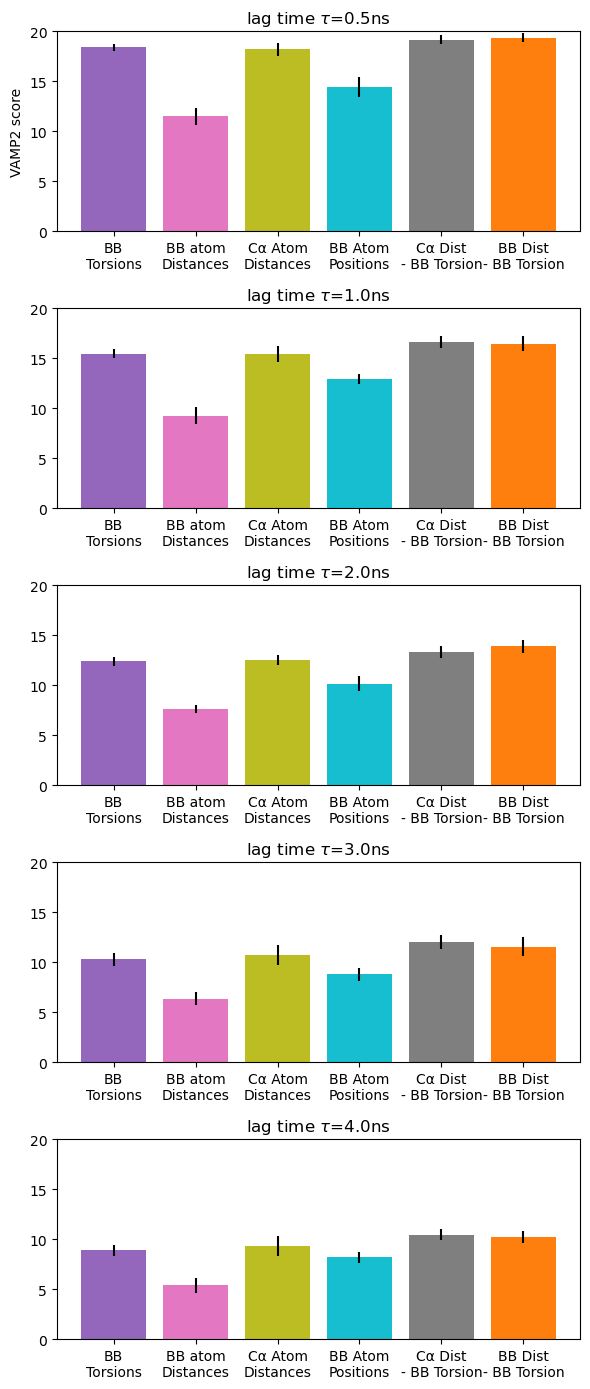

In [17]:
def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    # we temporarily suppress very short-lived progress bars
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in range(number_of_splits):
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


dim = 25

fig, axes = plt.subplots(5, 1, figsize=(6, 14), sharey=True)
for ax, lag in zip(axes.flat, [5, 10, 20, 30, 40]):
#     dssp_alpha_scores = score_cv(final_dssp[:,0], lag=lag, dim=1)
#     scores += [dssp_alpha_scores.mean()]
#     errors += [dssp_alpha_scores.std()]
#     dssp_beta_scores = score_cv(final_dssp[:,1], lag=lag, dim=1)
#     scores += [dssp_beta_scores.mean()]
#     errors += [dssp_beta_scores.std()]
#     dssp_coil_scores = score_cv(final_dssp[:,2], lag=lag, dim=1)
#     scores += [dssp_coil_scores.mean()]
#     errors += [dssp_coil_scores.std()]
#     rg_scores = score_cv(final_rg, lag=lag, dim=1)
#     scores += [rg_scores.mean()]
#     errors += [rg_scores.std()]
#     pr_scores_1st = score_cv(final_pr[:,2], lag=lag, dim=1)
#     scores += [pr_scores_1st.mean()]
#     errors += [pr_scores_1st.std()]
#     pr_scores_2nd = score_cv(final_pr[:,1], lag=lag, dim=1)
#     scores += [pr_scores_2nd.mean()]
#     errors += [pr_scores_2rd.std()]
#     pr_scores_3rd = score_cv(final_pr[:,0], lag=lag, dim=1)
#     scores += [pr_scores_3rd.mean()]
#     errors += [pr_scores_3rd.std()]
#     rmsd_scores = score_cv(final_rmsd, lag=lag, dim=1)
#     scores += [rmsd_scores.mean()]
#     errors += [rmsd_scores.std()]
    torsions_scores = score_cv(torsions_data, lag=lag, dim=dim)
    scores = [torsions_scores.mean()]
    errors = [torsions_scores.std()]
    positions_scores = score_cv(positions_data, lag=lag, dim=dim)
    scores += [positions_scores.mean()]
    errors += [positions_scores.std()]
    distances_scores = score_cv(distances_data, lag=lag, dim=dim)
    scores += [distances_scores.mean()]
    errors += [distances_scores.std()]
    distances_ca_scores = score_cv(distances_ca_data, lag=lag, dim=dim)
    scores += [distances_ca_scores.mean()]
    errors += [distances_ca_scores.std()]
    tor_ca_scores = score_cv(tor_ca_data, lag=lag, dim=dim)
    scores += [tor_ca_scores.mean()]
    errors += [tor_ca_scores.std()]
    dist_tor_scores = score_cv(dist_tor_data, lag=lag, dim=dim)
    scores += [dist_tor_scores.mean()]
    errors += [dist_tor_scores.std()]
    ax.bar(labels, scores, yerr=errors, color=['C4', 'C6', 'C8', 'C9', 'C7', 'C1'])
    ax.set_title(r'lag time $\tau$={:.1f}ns'.format(lag * 0.1))
    if lag == 5:
        # save for later
        vamp_bars_plot = dict(
            labels=labels, scores=scores, errors=errors, dim=dim, lag=lag)
        
axes[0].set_ylabel('VAMP2 score')
plt.ylim([0, 20])
fig.tight_layout()
plt.savefig('VAMP-2 Score - dim 25', dpi=300)
plt.savefig('VAMP-2 Score - dim 25.pdf', dpi=300)

## Dimensionality reduction

### Ca distance and bb torsion angles

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)


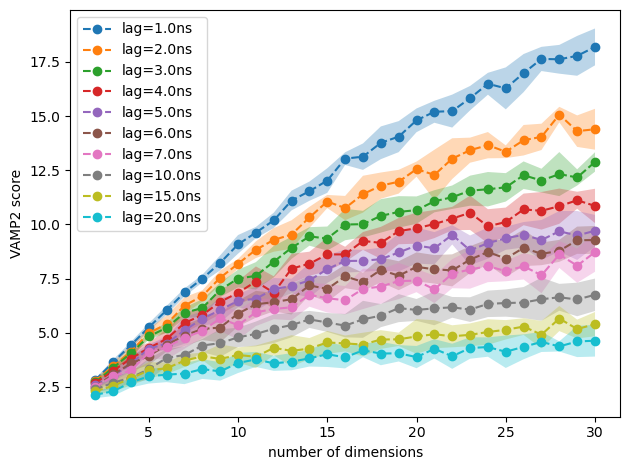

In [ ]:
lags = [10, 20, 30, 40, 50, 60, 70, 100, 150, 200]
dims = [i + 1 for i in range(1, 30, 1)]

fig, ax = plt.subplots()
for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(tor_ca_data, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = 'C{}'.format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, '--o', color=color, label='lag={:.1f}ns'.format(lag * 0.1))
ax.legend()
ax.set_xlabel('number of dimensions')
ax.set_ylabel('VAMP2 score')
fig.tight_layout()
plt.savefig('VAMP-2 Score - lag time | combo|tor-ca positions (1-30 dims)', dpi=300)
plt.savefig('VAMP-2 Score - lag time | combo|tor-ca positions (1-30 dims).pdf', dpi=300)

***

## Combo | Torsion angles & Ca distance

### TICA

In [19]:
# lag time of 10 ns was chosen
tica_tor_ca = pyemma.coordinates.tica(tor_ca_data, lag=100)
tica_output_tor_ca = tica_tor_ca.get_output()
tica_concatenated_tor_ca = np.concatenate(tica_output_tor_ca)

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [20]:
tica_concatenated_tor_ca.shape

(100010, 38)

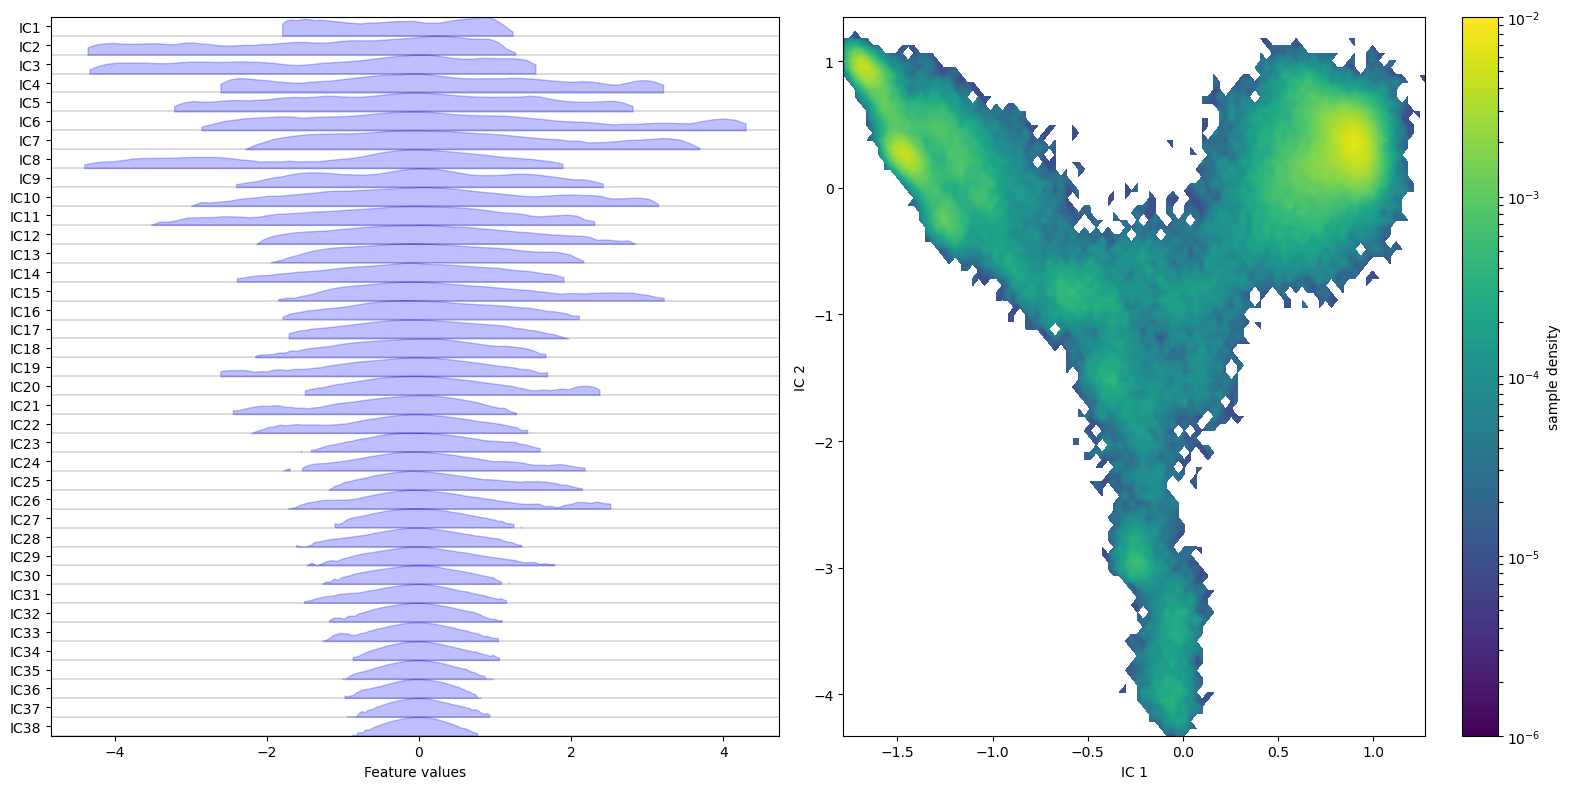

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
pyemma.plots.plot_feature_histograms(
    tica_concatenated_tor_ca,
    ax=axes[0],
    feature_labels=['IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6', 'IC7', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12', 'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC20', 'IC21', 'IC22', 'IC23', 'IC24', 'IC25', 'IC26', 'IC27', 'IC28', 'IC29', 'IC30', 'IC31', 'IC32', 'IC33', 'IC34', 'IC35', 'IC36', 'IC37', 'IC38'],
    ylog=True)
pyemma.plots.plot_density(*tica_concatenated_tor_ca[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('TICA - tor_ca - lag 10 ns', dpi=300)
plt.savefig('TICA - tor_ca - lag 10 ns.pdf', dpi=300)

In [ ]:
fig, axes = plt.subplots(38, 1, figsize=(24, 30), sharex=True)
x = 0.1 * np.arange(tica_output_tor_ca[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output_tor_ca[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('{}'.format(i + 1), fontsize=10)
axes[-1].set_xlabel('time / ns', fontsize=15)
fig.tight_layout()
plt.savefig('Trajectories - TICA tor_ca', dpi=300)
plt.savefig('Trajectories - TICA tor_ca.pdf', dpi=300)

### Discretization

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


29-09-23 04:20:20 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21324] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

29-09-23 04:20:24 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21488] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


29-09-23 04:20:26 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21592] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


29-09-23 04:20:27 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21600] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


29-09-23 04:20:27 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21608] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9
29-09-23 04:20:27 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21612] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

29-09-23 04:20:28 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21636] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

29-09-23 04:20:28 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21652] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

29-09-23 04:20:30 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21720] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9
29-09-23 04:20:30 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21724] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

29-09-23 04:20:33 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[21788] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

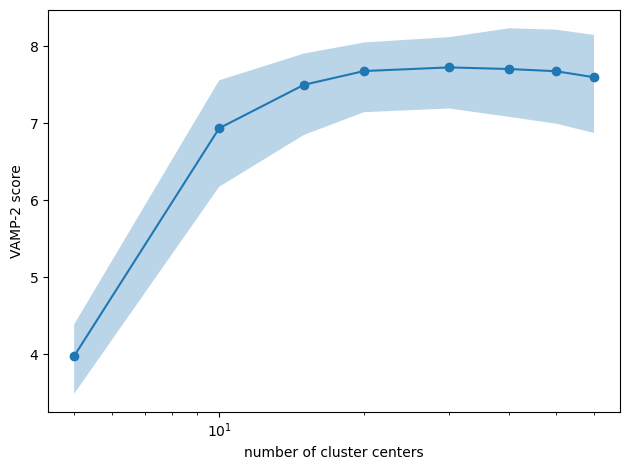

In [27]:
#previosly we chose lag time of 10 ns
n_clustercenters = [5, 10, 15, 20, 30, 40, 50, 60]

scores = np.zeros((len(n_clustercenters), 100))
for n, k in enumerate(n_clustercenters):
    for m in range(100):
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_output_tor_ca, k=k, max_iter=50, stride=50)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 100)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.tight_layout()
plt.savefig('VAMP2 score|num of cluster centers - tor_ca', dpi=300)
plt.savefig('VAMP2 score|num of cluster centers - tor_ca.pdf', dpi=300)

In [32]:
#25 cluster centers
#changed the strides from 10 to 1
cluster_tor_ca = pyemma.coordinates.cluster_kmeans(
    tica_output_tor_ca, k=25, max_iter=50, stride=10, fixed_seed=False)
dtrajs_concatenated_tor_ca = np.concatenate(cluster_tor_ca.dtrajs)

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

getting output of KmeansClustering:   0%|                                                                     …

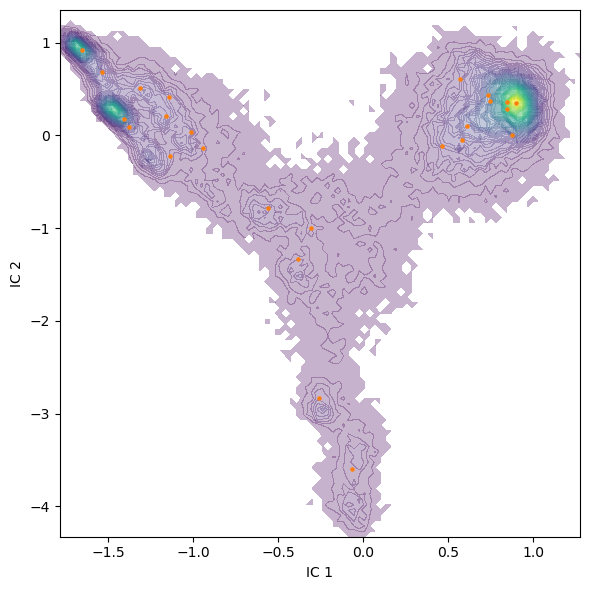

In [33]:
#25 cluster centers
fig, ax = plt.subplots(figsize=(6, 6))
pyemma.plots.plot_density(
    *tica_concatenated_tor_ca[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster_tor_ca.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('centers on the TICA dimensions - tor_ca - 25 centers', dpi=300)
plt.savefig('centers on the TICA dimensions - tor_ca - 25 centers.pdf', dpi=300)

In [34]:
cluster_tor_ca

KmeansClustering(clustercenters=array([[ 0.60803,  0.10547, ..., -0.01317,  0.07445],
       [-0.94374, -0.14178, ...,  0.13676, -0.05997],
       ...,
       [-1.30999,  0.51324, ..., -0.11248, -0.05181],
       [-1.65013,  0.92303, ...,  0.0351 ,  0.00868]], dtype=float32),
         fixed_seed=2504757555, init_strategy='kmeans++', keep_data=False,
         max_iter=50, metric='euclidean', n_clusters=25, n_jobs=8,
         oom_strategy='memmap', skip=0, stride=10, tolerance=1e-05)

### MSM estimation and validation 

### Implied timescales

estimating BayesianMSM:   0%|                                                                                 …

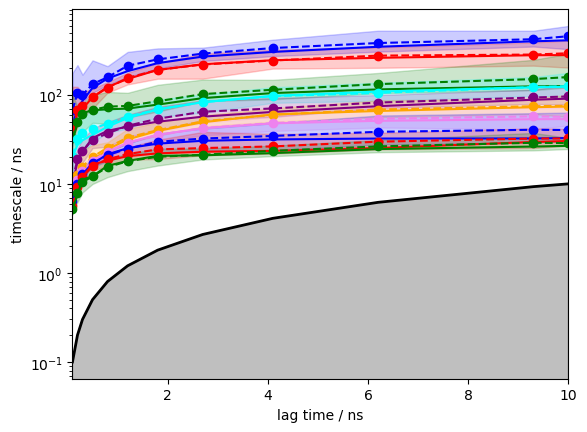

In [39]:
its_tor_ca = pyemma.msm.its(cluster_tor_ca.dtrajs, lags=100, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its_tor_ca, units='ns', dt=0.1);
plt.savefig('ITS - tor_ca - 25 cluster centers*', dpi=300)
plt.savefig('ITS - tor_ca - 25 cluster centers*.pdf', dpi=300)

In [40]:
#I'm going for lag time of 4ns from this point onward
msm_tor_ca = pyemma.msm.bayesian_markov_model(cluster_tor_ca.dtrajs, lag=40, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm_tor_ca.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm_tor_ca.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[24226]: Sampling MSMs:   0%|                                   …

fraction of states used = 1.00
fraction of counts used = 1.00


In [41]:
msm_tor_ca

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=40,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=5, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (13).

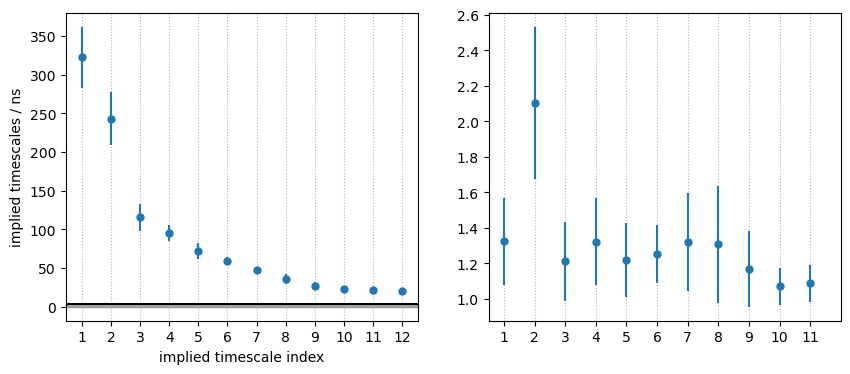

In [42]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 12

timescales_mean_tor_ca = msm_tor_ca.sample_mean('timescales', k=nits)
timescales_std_tor_ca = msm_tor_ca.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean_tor_ca,
    yerr=timescales_std_tor_ca,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean_tor_ca[:-1] / timescales_mean_tor_ca[1:],
    yerr=its_separation_err(
        timescales_mean_tor_ca,
        timescales_std_tor_ca),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm_tor_ca.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm_tor_ca.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
plt.savefig('examining the implied timescales - tor_ca - lag 4ns', dpi=300)

### Chapman-Kolmogorov test

estimating BayesianMSM:   0%|                                                                                 …

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/deeptime/markov/tools/analysis/_api.py:256: UserWarning: truncated eigendecomposition to contain 24 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


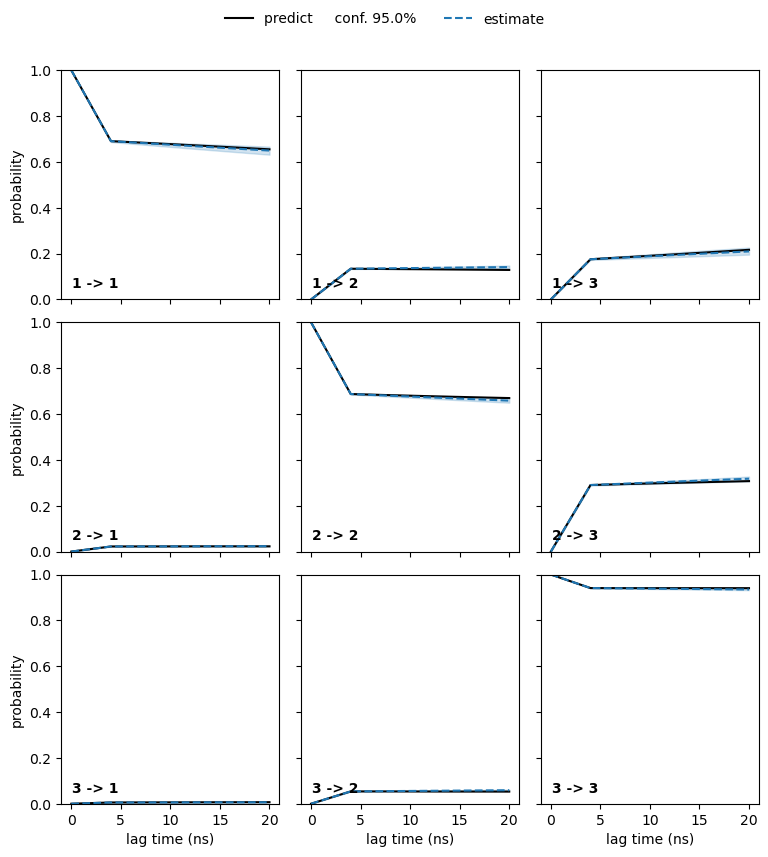

In [43]:
#3 states
nstates_tor_ca = 3
cktest_tor_ca = msm_tor_ca.cktest(nstates_tor_ca, mlags=6)
pyemma.plots.plot_cktest(cktest_tor_ca, dt=0.1, units='ns');
plt.savefig('Chapman-Kolmogorov test - tor_ca - 3 states', dpi=300)
plt.savefig('Chapman-Kolmogorov test - tor_ca - 3 states.pdf', dpi=300)

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/pyemma/plots/plots2d.py:251: UserWarning: weights_tor_ca=[4.25706432e-06 4.25706432e-06 4.25706432e-06 ... 1.36894809e-05
 1.36894809e-05 1.36894809e-05] is not an allowed optional parameter and will be ignored
  _warn(


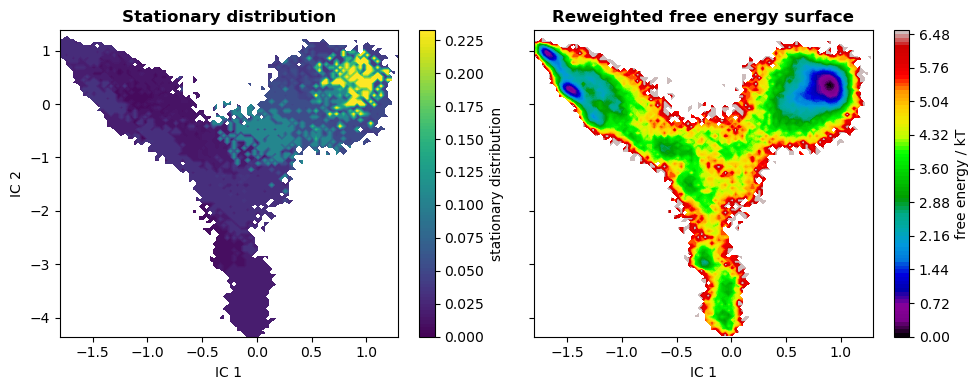

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated_tor_ca[:, :2].T,
    msm_tor_ca.pi[dtrajs_concatenated_tor_ca],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated_tor_ca[:, :2].T,
    weights_tor_ca=np.concatenate(msm_tor_ca.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
plt.savefig('stationary distribution & the free energy - tor_ca', dpi=300)
plt.savefig('stationary distribution & the free energy - tor_ca.pdf', dpi=300)

### Perron cluster cluster analysis

In [45]:
#3 states
msm_tor_ca.pcca(nstates_tor_ca)

PCCA-6533823552:[{'P': array([[6.03353490e-01, 4.87862210e-05, 3.03293515e-02, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.90132769e-02,
                        0.00000000e+00, 1.68135575e-02, 8.77970220e-04, 9.38720127e-03,
                        0.00000000e+00, 1.64290861e-02, 0.00000000e+00, 2.06529615e-02,
                        0.00000000e+00, 1.13455972e-04, 1.57953436e-03, 2.09342168e-01,
                        5.17018943e-02, 0.00000000e+00, 3.57266851e-04, 0.00000000e+00,
                        0.00000000e+00],
                       [1.97340836e-04, 7.43097238e-01, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 5.97284847e-03, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 2.41938781e-02, 0.00000000e+00, 0.00000000e+00,
                        4.72163450e-02, 3.94925857e-03, 5.56686135e-03, 0.00000000e+00,
                        0.00000000e+00, 1.16025379e-01, 3.62051803e-02, 

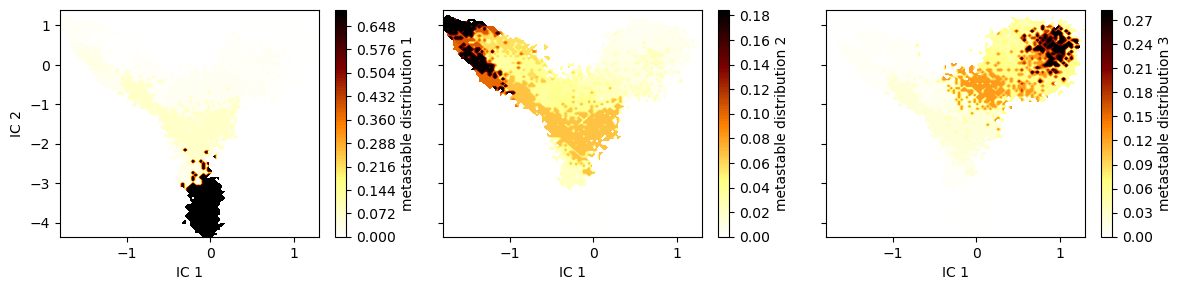

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated_tor_ca[:, :2].T,
        msm_tor_ca.metastable_distributions[i][dtrajs_concatenated_tor_ca],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('PCCA++ membership - tor_ca - for 3 states', dpi=300)
plt.savefig('PCCA++ membership - tor_ca - for 3 states.pdf', dpi=300)

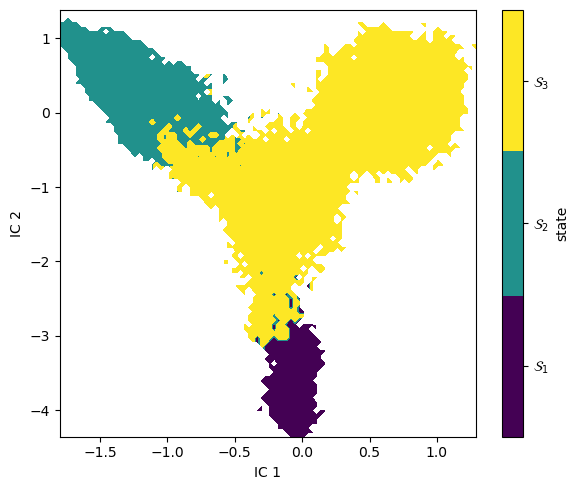

In [47]:
metastable_traj_tor_ca = msm_tor_ca.metastable_assignments[dtrajs_concatenated_tor_ca]

fig, ax = plt.subplots(figsize=(6, 5))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated_tor_ca[:, :2].T, metastable_traj_tor_ca, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates_tor_ca)])
fig.tight_layout()
plt.savefig('PCCA++ on TICA progection - tor_ca - 3 states', dpi=300)
plt.savefig('PCCA++ on TICA progection - tor_ca - 3 states.pdf', dpi=300)

In [48]:
pcca_samples_tor_ca = msm_tor_ca.sample_by_distributions(msm_tor_ca.metastable_distributions, 10)
tor_ca_source = pyemma.coordinates.source(files, features=tor_ca_feat)
pyemma.coordinates.save_trajs(
    tor_ca_source,
    pcca_samples_tor_ca,
    outfiles=['./pcca{}_tor_ca_10samples.pdb'.format(n + 1)
              for n in range(msm_tor_ca.n_metastable)])

Obtaining file info:   0%|                                                                                    …

['./pcca1_tor_ca_10samples.pdb',
 './pcca2_tor_ca_10samples.pdb',
 './pcca3_tor_ca_10samples.pdb']

In [49]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm_tor_ca.metastable_sets):
    p_tor_ca = msm_tor_ca.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p_tor_ca, -np.log(p_tor_ca)))

state	π		G/kT
1	0.017539	4.043340
2	0.145150	1.929986
3	0.837311	0.177560


In [50]:
from itertools import product

mfpt_tor_ca = np.zeros((nstates_tor_ca, nstates_tor_ca))
for i, j in product(range(nstates_tor_ca), repeat=2):
    mfpt_tor_ca[i, j] = msm_tor_ca.mfpt(
        msm_tor_ca.metastable_sets[i],
        msm_tor_ca.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt_tor_ca, decimals=2), index=range(1, nstates_tor_ca + 1), columns=range(1, nstates_tor_ca + 1))

MFPT / ns:


,1,2,3
1,0.00,1261.36,243.84
2,14001.91,0.00,212.84
3,14255.91,1458.96,0.00


***

## Sample Structures of each state

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [52]:
pcca1_ = mpimg.imread('pcca1_tor_ca.png')
pcca2_ = mpimg.imread('pcca2_tor_ca.png')
pcca3_ = mpimg.imread('pcca3_tor_ca.png')

Text(0.5, 1.0, 'State 3')

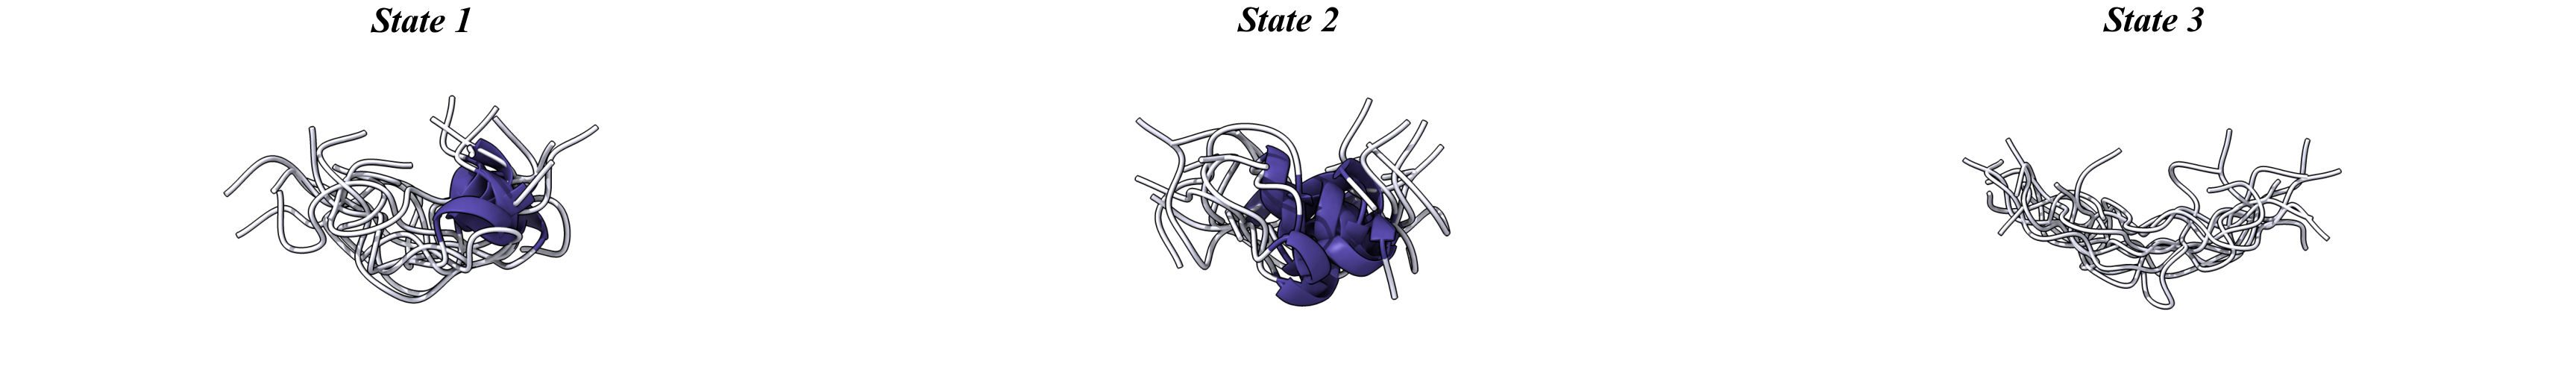

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(35, 15))
plt.rcParams["font.family"] = "Times New Roman"
fig.tight_layout()

#get rid of the axis on the plots/images
for ax in axs.ravel():
    ax.set_axis_off()

axs[0].imshow(pcca1_)
# axs[0,0].axis('off')
axs[0].set_title('State 1', y=1.0, pad=-20, fontsize = 35, fontweight="bold", style = 'italic')

axs[1].imshow(pcca2_)
# axs[0,1].axis('off')
axs[1].set_title('State 2', y=1.0, pad=-20, fontsize = 35, fontweight="bold", style = 'italic')

axs[2].imshow(pcca3_)
# axs[0,2].axis('off')
axs[2].set_title('State 3', y=1.0, pad=-20, fontsize = 35, fontweight="bold", style = 'italic')




### deleting extra plots
#fig.delaxes(axs[2,1])
#fig.delaxes(axs[2,2])

***